In [ ]:
import numpy as np
import matplotlib.pyplot as plt

(499, 327, 3)
(256, 256, 3)


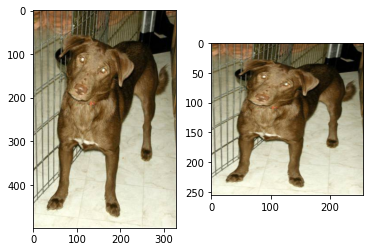

In [ ]:
import cv2

image_1=cv2.imread('/content/drive/MyDrive/Dataset/training_set-20230206T064947Z-001/training_set/dogs/dog.1.jpg')

## original image

plt.subplot(1,2,1)
plt.imshow(image_1[:,:,::-1])

print(image_1.shape)

## resizing the image

image_resize=cv2.resize(image_1,((256,256)))

print(image_resize.shape)

plt.subplot(1,2,2)
plt.imshow(image_resize[:,:,::-1])

In [ ]:
## setting same size of an image

img_height,img_width=[256,256]

In [ ]:
## finding the data

path='/content/drive/MyDrive/Dataset'

In [ ]:
## finding training data path and test data path
train_data_path='/content/drive/MyDrive/Dataset/training_set-20230206T064947Z-001/training_set'
test_data_path='/content/drive/MyDrive/Dataset/test_set-20230206T064829Z-001'

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
## data preprocessing on the image using tensorflow imagedatagenerator module

training_prepross=ImageDataGenerator(rescale=1./255,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=True)
## As we rescaled the pixels in training so same has to be applied for testing

testing_process=ImageDataGenerator(1./255)

In [ ]:
## Finding the label folders:
## using glob we can find the number of label folders in training_folder:

import glob 
from glob import glob

glob('//content/drive/MyDrive/Dataset/training_set-20230206T064947Z-001/training_set/*')

['//content/drive/MyDrive/Dataset/training_set-20230206T064947Z-001/training_set/dogs',
 '//content/drive/MyDrive/Dataset/training_set-20230206T064947Z-001/training_set/cats']

In [ ]:
## for test data

glob('//content/drive/MyDrive/Dataset/test_set-20230206T064829Z-001/*')

['//content/drive/MyDrive/Dataset/test_set-20230206T064829Z-001/dogs',
 '//content/drive/MyDrive/Dataset/test_set-20230206T064829Z-001/cats']

In [ ]:
target=['cats','dogs']

In [ ]:
## collecting each image from training labels folder and test label folders:

train_data=training_prepross.flow_from_directory(train_data_path,
                                      target_size=(img_height,img_width),
                                      classes=target,
                                      class_mode ='binary',
                                      batch_size=32)
test_data=testing_process.flow_from_directory(test_data_path,
                                    target_size=(img_height,img_width),
                                    classes=target,
                                    class_mode = 'binary',
                                    batch_size=32)

Found 8005 images belonging to 2 classes.
Found 2028 images belonging to 2 classes.


In [ ]:
## building an CNN model architecture:
## importing required packages:

from tensorflow.keras.models import Sequential # beginnnig  of CNN 
from tensorflow.keras.layers import Conv2D , MaxPool2D ,Flatten,Activation , Dense
from tensorflow.keras.activations import relu,sigmoid,softmax
from tensorflow.keras.optimizers import Adam

In [ ]:
## building CNN architecture

model=Sequential()

## first hidden layer in CNN
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',input_shape=(img_height,img_width,3)))
model.add(MaxPool2D(pool_size=(2,2)))

## second hidden layer in CNN
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

## third hidden layer in CNN
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

## fourth hidden layer in CNN
model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

## fifth hidden layer in CNN
model.add(Conv2D(8,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

## sixth hidden layer in CNN
model.add(Conv2D(4,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())  ## converting into 1-d and giving it to ANN


model.add(Dense(32,activation='relu')) ## first hidden layer in ann
model.add(Dense(16,activation='relu')) ## second hidden layer in ann
model.add(Dense(8,activation='relu')) ## third hidden layer in ann

model.add(Dense(1,activation='sigmoid')) ## output

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['Accuracy'])


In [ ]:
model.fit(train_data , epochs = 20)

Epoch 1/20
251/251 [==============================] - 143s 573ms/step - loss: 0.6526 - Accuracy: 0.6136
Epoch 2/20
251/251 [==============================] - 144s 571ms/step - loss: 0.6348 - Accuracy: 0.6292
Epoch 3/20
251/251 [==============================] - 144s 574ms/step - loss: 0.6137 - Accuracy: 0.6563
Epoch 4/20
251/251 [==============================] - 146s 581ms/step - loss: 0.5979 - Accuracy: 0.6680
Epoch 5/20
251/251 [==============================] - 145s 578ms/step - loss: 0.5817 - Accuracy: 0.6902
Epoch 6/20
251/251 [==============================] - 150s 598ms/step - loss: 0.5645 - Accuracy: 0.7044
Epoch 7/20
251/251 [==============================] - 146s 581ms/step - loss: 0.5568 - Accuracy: 0.7136
Epoch 8/20
251/251 [==============================] - 147s 586ms/step - loss: 0.5491 - Accuracy: 0.7159
Epoch 9/20
251/251 [==============================] - 145s 577ms/step - loss: 0.5358 - Accuracy: 0.7293
Epoch 10/20
251/251 [==============================] - 146s 581m

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'Accuracy'])

In [ ]:
model.history.history['loss']

[0.6525713205337524,
 0.6347820162773132,
 0.613717257976532,
 0.5978920459747314,
 0.5817288160324097,
 0.5645325183868408,
 0.5568321943283081,
 0.549105703830719,
 0.5358221530914307,
 0.5188964605331421,
 0.5106361508369446,
 0.5028842091560364,
 0.5032115578651428,
 0.47935807704925537,
 0.4683457016944885,
 0.4713178277015686,
 0.45970839262008667,
 0.44863930344581604,
 0.43711933493614197,
 0.41755056381225586]

In [ ]:
model.history.history['Accuracy']

[0.6136164665222168,
 0.6292317509651184,
 0.6563397645950317,
 0.6679575443267822,
 0.6901936531066895,
 0.7044347524642944,
 0.7135540246963501,
 0.7159275412559509,
 0.7292941808700562,
 0.7379137873649597,
 0.7516552209854126,
 0.7534041404724121,
 0.7534041404724121,
 0.7752654552459717,
 0.7738913297653198,
 0.7685196995735168,
 0.784759521484375,
 0.7925046682357788,
 0.7925046682357788,
 0.8134915828704834]

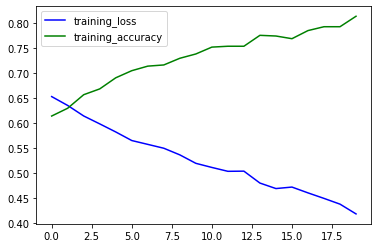

In [ ]:
plt.plot(np.arange(20), model.history.history['loss'],color='b',label='training_loss')
plt.plot(np.arange(20),model.history.history['Accuracy'],color='g',label='training_accuracy')
plt.legend(loc=0)
plt.show()

In [ ]:
test_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
test_report=model.predict(test_data)
test_report

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


64/64 [==============================] - 522s 8s/step


array([[0.00120492],
       [1.        ],
       [1.        ],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]], dtype=float32)

In [ ]:
c=[]
for i in test_report:
  if i>0.5:
    c.append(1)
  else:
    c.append(0)  

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(test_data.classes,c)

0.51232741617357

In [ ]:
confusion_matrix(test_data.classes,c)

array([[369, 647],
       [342, 670]])

In [ ]:
print(classification_report(test_data.classes,c))

              precision    recall  f1-score   support

           0       0.52      0.36      0.43      1016
           1       0.51      0.66      0.58      1012

    accuracy                           0.51      2028
   macro avg       0.51      0.51      0.50      2028
weighted avg       0.51      0.51      0.50      2028



checking with own data

In [ ]:
import cv2

In [ ]:
def testing_images(path):
  img=cv2.imread(path)

  img=cv2.resize(img,(img_height,img_width))

  img=np.array(img)/255.0

  img=np.expand_dims(img,axis=0)

  result=model.predict(img)
  print(result)
  if result>0.5:
    print('dog')
  else:
    print('cat') 

  image=plt.imread(path)
  plt.imshow(image)   

1/1 [==============================] - 0s 25ms/step
[[0.927487]]
dog


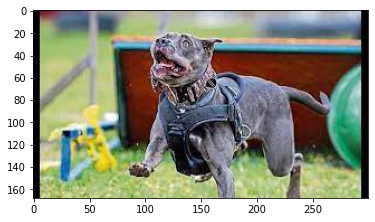

In [ ]:
testing_images('/content/drive/MyDrive/download.jpg')

1/1 [==============================] - 0s 28ms/step
[[0.33715084]]
cat


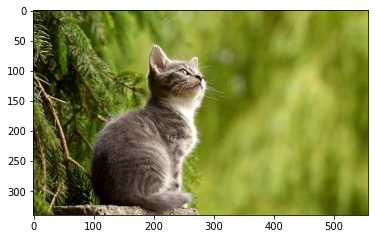

In [ ]:
testing_images('/content/drive/MyDrive/cat-2083492__340.jpg')

1/1 [==============================] - 0s 17ms/step
[[0.8991874]]
dog


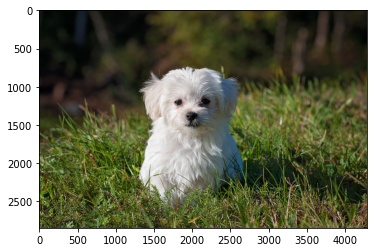

In [ ]:
testing_images('/content/drive/MyDrive/pexels-pixabay-33053.jpg')